<a href="https://colab.research.google.com/github/Mohamed-sobhi/amr-ros-config/blob/master/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
Uploadedfile=files.upload()

Saving ReducedMNIST.mat to ReducedMNIST (2).mat


In [0]:
#Let's start by importing analysis and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import cv2
import time
from sklearn import datasets, svm, metrics
%matplotlib inline

from zigzag import *

from sklearn import preprocessing

import scipy.io as sio
Data = sio.loadmat('/content/ReducedMNIST.mat')

In [4]:
#Doing some data inspection and checking

"""
Data
type(Data)
type(Data['SmallTestData'])
Data['SmallTestData'][0][0].shape
plt.imshow(Data['SmallTestData'][4][0][3])
plt.imshow(Data['SmallTestData'][0][0][1])
Data['SmallTrainData'][0][0].shape

"""

"\nData\ntype(Data)\ntype(Data['SmallTestData'])\nData['SmallTestData'][0][0].shape\nplt.imshow(Data['SmallTestData'][4][0][3])\nplt.imshow(Data['SmallTestData'][0][0][1])\nData['SmallTrainData'][0][0].shape\n\n"

In [0]:
#Initializing Dataframes and checking


Int_test_Dataset=np.zeros([10,100,784])
for itemvar1 in range(10):
  for itemvar2 in range(100):
      Dummy_val=np.zeros([784])
      Dummy_val= Data['SmallTestData'][itemvar1][0][itemvar2].reshape(1,784)
      Dummy_val=preprocessing.normalize(Dummy_val)
      Int_test_Dataset[itemvar1][itemvar2]= Dummy_val
      
Int_train_Dataset=np.zeros([10,1000,784])
for itemvar3 in range(10):
  for itemvar4 in range(1000):
    Dummy_val=np.zeros([784])
    Dummy_val= Data['SmallTrainData'][itemvar3][0][itemvar4].reshape(1,784)
    Dummy_val=preprocessing.normalize(Dummy_val)
    Int_train_Dataset[itemvar3][itemvar4]= Dummy_val

#plt.imshow(Int_test_Dataset[0][0].reshape(28,28))
#plt.imshow(Int_train_Dataset[4][90].reshape(28,28))


Int_train_DataFrame = pd.Panel(Int_train_Dataset).transpose(2,0,1).to_frame()
Int_test_DataFrame = pd.Panel(Int_test_Dataset).transpose(2,0,1).to_frame()

#Int_train_DataFrame
#plt.imshow(Int_train_DataFrame.loc[0].loc[0].values.reshape(28,28))
#plt.imshow(Int_test_DataFrame.loc[8].loc[80].values.reshape(28,28))

In [0]:
#Getting DCT features of 80 dimensions of the whole trainig and test sets using Block based zigzag appraoch
#Which means that we will divide each picture to blocks and get the DCT of each block

#Defining block size and getting dimensions, Block size must be even number for DCT
Block_Size = 14   

#Choosing Block size to be 14*14*4=784 i.e no zero padding for DCT is required as 28*28=784
height= 28.0
width = 28.0

#Getting number of blocks from height and width
NumHB = math.ceil(height/Block_Size)
NumHB = np.int32(NumHB)
NumWB = math.ceil(width/Block_Size)
NumWB = np.int32(NumWB)


In [0]:
DCT_train_Coeff=np.zeros([10,1000,80])
DCT_test_Coeff=np.zeros([10,100,80])

Dummy_val=0

for itemvar1 in range(10):
  for itemvar2 in range(1000):
    
    Dummy_val=0
    
    Img = Int_train_DataFrame.loc[itemvar1].loc[itemvar2].values.reshape(28,28)
                
    #plt.imshow((Padded_Img))
                
    #Getting DCT for each block 
    for itemvar3 in range(NumHB):
         
    # Compute start and end row index of the block
      Row_Ind_Start = itemvar3*Block_Size
      Row_Ind_End = Row_Ind_Start+Block_Size

      for itemvar4 in range(NumWB):
        
        Dummy_val+=1
             
        # Compute start and end col index of the block
        col_Ind_Start = itemvar4*Block_Size
        col_Ind_End = col_Ind_Start+Block_Size
                   
        # Apply 2D discrete cosine transform to the selected block
        Block = Img[ Row_Ind_Start : Row_Ind_End , col_Ind_Start : col_Ind_End ]
        DCT = cv2.dct(Block)

        # Reorder DCT coefficients in zig zag order by calling zigzag function giving one dimensional array
        Reordered_Coeff = zigzag(DCT)

        DCT_train_Coeff[itemvar1][itemvar2][(Dummy_val-1)*20 : 20+(Dummy_val-1)*20] =  Reordered_Coeff[0:20]  
        
for itemvar1 in range(10):
  for itemvar2 in range(100):
    
    Dummy_val=0
    
    Img = Int_test_DataFrame.loc[itemvar1].loc[itemvar2].values.reshape(28,28)
                
    #plt.imshow((Padded_Img))
                
    #Getting DCT for each block 
    for itemvar3 in range(NumHB):
         
    # Compute start and end row index of the block
      Row_Ind_Start = itemvar3*Block_Size
      Row_Ind_End = Row_Ind_Start+Block_Size

      for itemvar4 in range(NumWB):
        
        Dummy_val+=1
             
        # Compute start and end col index of the block
        col_Ind_Start = itemvar4*Block_Size
        col_Ind_End = col_Ind_Start+Block_Size
                   
        # Apply 2D discrete cosine transform to the selected block
        Block = Img[ Row_Ind_Start : Row_Ind_End , col_Ind_Start : col_Ind_End ]
        DCT = cv2.dct(Block)

        # Reorder DCT coefficients in zig zag order by calling zigzag function giving one dimensional array
        Reordered_Coeff = zigzag(DCT)

        DCT_test_Coeff[itemvar1][itemvar2][(Dummy_val-1)*20 : 20+(Dummy_val-1)*20] =  Reordered_Coeff[0:20]                  
 

In [0]:
#Getting DataFrame of DCT coefficients and checking

#DCT_train_Coeff[9][999]

DCT_test_Coeff_DataFrame = pd.Panel(DCT_test_Coeff).transpose(2,0,1).to_frame()
DCT_train_Coeff_DataFrame = pd.Panel(DCT_train_Coeff).transpose(2,0,1).to_frame()

#DCT_train_Coeff_DataFrame


PCA(copy=True, iterated_power='auto', n_components=159, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

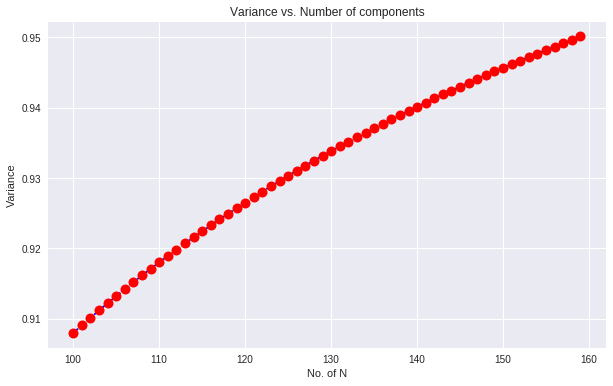

In [9]:
#Applying PCA on train data
#Importing libraries for PCA analysis

from sklearn.decomposition import PCA

#Using elbow method to find number of components such that variance doesnt' go below 95%

Variance=[]

for tempvar1 in range(100,160):
    pca=PCA(n_components=tempvar1,svd_solver='full')
    pca.fit(Int_train_DataFrame)
    Variance.append(pca.explained_variance_ratio_.sum())
    
plt.figure(figsize=(10,6))
plt.plot(range(100,160),Variance,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Variance vs. Number of components')
plt.xlabel('No. of N')
plt.ylabel('Variance')


#Number of featuers equal 159 for best variance result, now getting the coefficients
pca=PCA(n_components=159,svd_solver='full')
pca.fit(Int_train_DataFrame)


In [10]:
#Just Checking
print(pca.explained_variance_ratio_.sum()) 

0.9501267508801964


In [0]:
#Getting DataFrame of PCA coefficients for test and train data and checking

PCA_train_Coeff=pca.transform(Int_train_DataFrame)
PCA_train_Coeff_DataFrame = pd.DataFrame(PCA_train_Coeff)

pca.fit(Int_test_DataFrame)
PCA_test_Coeff=pca.transform(Int_test_DataFrame)
PCA_test_Coeff_DataFrame = pd.DataFrame(PCA_test_Coeff)


#PCA_train_Coeff_DataFrame.loc[1:2].values

In [0]:
#create data labels 
Datatrain_label=np.zeros((10000))
Datatest_label=np.zeros((1000))
for i in range(10):
  for j in range(1000):
    Datatrain_label[j+(1000*i)]=i
for i in range(10):
  for j in range(100):
    Datatest_label[j+(100*i)]=i
#Datatrain_label=np.reshape(Datatrain_label,(10000,1))
#Datatest_label=np.reshape(Datatest_label,(1000,1))


In [109]:
print("PCA & Linear svm")
start_time1 = time.time()
svm_classifier1=svm.LinearSVC(max_iter=10000)
svm_classifier1.fit(PCA_train_Coeff_DataFrame,Datatrain_label)

Expected_va_1 =Datatest_label 
Predicted_va_1= svm_classifier1.predict(PCA_test_Coeff_DataFrame)

print("---Processing time    %s    seconds ---" % (time.time() - start_time1))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Expected_va_1, Predicted_va_1))
print("Accuracy: %0.4f" % metrics.accuracy_score(Expected_va_1, Predicted_va_1))

PCA & Linear svm
---Processing time    1.1168904304504395    seconds ---
Confusion matrix:
[[99  0  0  0  0  0  0  0  1  0]
 [ 0 95  0  0  0  0  1  2  2  0]
 [ 1  1 88  0  0  0  5  2  3  0]
 [ 0  0  1 91  0  2  0  3  3  0]
 [ 0  0  0  0 88  0  2  0  1  9]
 [ 0  1  0  3  0 83  7  0  6  0]
 [ 0  0  2  0  0  1 97  0  0  0]
 [ 0  2  1  2  1  0  1 92  0  1]
 [ 1  0  4  2  2  5  2  2 80  2]
 [ 0  1  0  0  7  1  0  0  0 91]]
Accuracy: 0.9040


In [106]:
print("DCT & Linear svm")
start_time2 = time.time()
svm_classifier2=svm.LinearSVC(max_iter=10000)
svm_classifier2.fit(DCT_train_Coeff_DataFrame, Datatrain_label)

Expected_va_2 =Datatest_label 
Predicted_va_2 = svm_classifier2.predict(DCT_test_Coeff_DataFrame)

print("---Processing time    %s    seconds ---" % (time.time() - start_time2))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Expected_va_2, Predicted_va_2))
print("Accuracy: %0.4f" % metrics.accuracy_score(Expected_va_2, Predicted_va_2))

DCT & Linear svm
---Processing time 0.7193331718444824 seconds ---
Confusion matrix:
[[99  0  0  0  0  0  0  0  1  0]
 [ 0 95  0  0  0  0  1  2  2  0]
 [ 1  1 87  1  0  0  5  2  3  0]
 [ 0  0  1 90  0  3  0  3  3  0]
 [ 0  1  0  0 90  0  1  0  0  8]
 [ 0  1  0  2  1 85  5  1  5  0]
 [ 0  0  1  0  1  1 97  0  0  0]
 [ 0  1  1  1  2  0  0 92  0  3]
 [ 1  1  1  1  1  4  2  2 87  0]
 [ 0  1  1  0  6  0  0  0  0 92]]
Accuracy: 0.9140


In [107]:
print("PCA & Non linear svm")
start_time3 = time.time()
svm_classifier_Non_pca = svm.SVC(kernel="rbf",gamma='auto', C=5,cache_size=800,max_iter=10000 )
svm_classifier_Non_pca.fit(PCA_train_Coeff_DataFrame, Datatrain_label)

Expected_va_3 =Datatest_label 
Predicted_va_3 = svm_classifier_Non_pca.predict(PCA_test_Coeff_DataFrame)

print("--- Processing time    %s    seconds ---" % (time.time() - start_time3))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Expected_va_3, Predicted_va_3))
print("Accuracy: %0.4f" % metrics.accuracy_score(Expected_va_3, Predicted_va_3))

PCA & Non linear svm
--- Processing time 14.461113452911377 seconds ---
Confusion matrix:
[[96  0  0  0  0  4  0  0  0  0]
 [ 0 98  0  0  0  1  1  0  0  0]
 [ 0  1 83  1  1  0  5  3  5  1]
 [ 0  0  1 86  0  7  2  2  2  0]
 [ 0  0  0  0 85  1  2  0  0 12]
 [ 0  2  0  3  1 86  8  0  0  0]
 [ 0  0  3  0  1  2 94  0  0  0]
 [ 0  5  2  0  2  0  0 86  2  3]
 [ 0  1  2  4  0  7  2  2 78  4]
 [ 0  1  1  0  6  0  0  0  1 91]]
Accuracy: 0.8830


In [108]:
print("DCT & Non linear svm")
start_time4 = time.time()
svm_classifier_Non_dct = svm.SVC(kernel="rbf",gamma='auto',C=5,cache_size=800,max_iter=10000 )
svm_classifier_Non_dct.fit(DCT_train_Coeff_DataFrame, Datatrain_label)

Expected_va_4 =Datatest_label 
Predicted_va_4= svm_classifier_Non_dct.predict(DCT_test_Coeff_DataFrame)

print("--- Processing time    %s    seconds ---" % (time.time() - start_time4))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(Expected_va_4, Predicted_va_4))
print("Accuracy: %0.4f" % metrics.accuracy_score(Expected_va_4, Predicted_va_4))

DCT & Non linear svm
--- Processing time 6.599713563919067 seconds ---
Confusion matrix:
[[96  0  0  0  0  4  0  0  0  0]
 [ 0 97  0  0  0  1  1  0  1  0]
 [ 2  1 85  0  1  1  4  2  3  1]
 [ 0  0  1 89  0  5  0  1  3  1]
 [ 0  0  0  1 85  0  3  0  0 11]
 [ 0  2  0  2  1 88  6  0  1  0]
 [ 0  0  3  0  1  2 94  0  0  0]
 [ 0  4  3  0  2  0  0 85  1  5]
 [ 1  3  1  3  0  7  1  3 79  2]
 [ 0  1  1  0  5  0  0  1  0 92]]
Accuracy: 0.8900
